Research question: How do lifestyle factors influence the likelihood of developing Type 1 Diabetes?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv("diabetes.csv")
df

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,40,44,38,High,Healthy,...,76,No,No,Positive,3,Normal,56,Ketones Present,2629,No
1,Neonatal Diabetes Mellitus (NDM),Positive,Negative,No,Present,13,1,17,High,Healthy,...,60,Yes,No,Negative,1,Normal,28,Glucose Present,1881,Yes
2,Prediabetic,Positive,Positive,Yes,Present,27,36,24,High,Unhealthy,...,80,Yes,No,Negative,1,Abnormal,55,Ketones Present,3622,Yes
3,Type 1 Diabetes,Negative,Positive,No,Present,8,7,16,Low,Unhealthy,...,89,Yes,No,Positive,2,Abnormal,60,Ketones Present,3542,No
4,Wolfram Syndrome,Negative,Negative,Yes,Present,17,10,17,High,Healthy,...,41,No,No,Positive,1,Normal,24,Protein Present,1770,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,Steroid-Induced Diabetes,Negative,Negative,Yes,Present,24,38,35,High,Unhealthy,...,71,Yes,Yes,Positive,2,Abnormal,34,Normal,2575,No
69996,LADA,Positive,Positive,No,Absent,21,51,31,Low,Unhealthy,...,82,Yes,Yes,Negative,1,Abnormal,58,Ketones Present,3002,No
69997,Type 1 Diabetes,Positive,Negative,No,Absent,18,11,15,Low,Unhealthy,...,77,Yes,Yes,Positive,2,Normal,53,Protein Present,3593,No
69998,Cystic Fibrosis-Related Diabetes (CFRD),Positive,Negative,No,Absent,32,30,24,High,Healthy,...,70,No,No,Positive,1,Abnormal,35,Ketones Present,2592,Yes


In [4]:
df2 = df[['Target', 'Genetic Markers', 'Physical Activity', 'Dietary Habits', 'Smoking Status', 'Alcohol Consumption', 'BMI', 'Age']]
df2

,Target,Genetic Markers,Physical Activity,Dietary Habits,Smoking Status,Alcohol Consumption,BMI,Age
0,Steroid-Induced Diabetes,Positive,High,Healthy,Smoker,High,38,44
1,Neonatal Diabetes Mellitus (NDM),Positive,High,Healthy,Non-Smoker,Moderate,17,1
2,Prediabetic,Positive,High,Unhealthy,Smoker,High,24,36
3,Type 1 Diabetes,Negative,Low,Unhealthy,Smoker,Moderate,16,7
4,Wolfram Syndrome,Negative,High,Healthy,Smoker,Moderate,17,10
...,...,...,...,...,...,...,...,...
69995,Steroid-Induced Diabetes,Negative,High,Unhealthy,Non-Smoker,Low,35,38
69996,LADA,Positive,Low,Unhealthy,Smoker,Low,31,51
69997,Type 1 Diabetes,Positive,Low,Unhealthy,Smoker,High,15,11
69998,Cystic Fibrosis-Related Diabetes (CFRD),Positive,High,Healthy,Non-Smoker,Moderate,24,30


In [5]:
type1_diabetes_data = df2[df2['Target'] == 'Type 1 Diabetes']
type1_diabetes_data

,Target,Genetic Markers,Physical Activity,Dietary Habits,Smoking Status,Alcohol Consumption,BMI,Age
3,Type 1 Diabetes,Negative,Low,Unhealthy,Smoker,Moderate,16,7
11,Type 1 Diabetes,Positive,Low,Unhealthy,Smoker,Moderate,23,29
19,Type 1 Diabetes,Negative,Low,Unhealthy,Non-Smoker,High,18,16
36,Type 1 Diabetes,Positive,High,Unhealthy,Non-Smoker,High,22,22
43,Type 1 Diabetes,Positive,Moderate,Healthy,Non-Smoker,Low,16,28
...,...,...,...,...,...,...,...,...
69932,Type 1 Diabetes,Positive,High,Unhealthy,Non-Smoker,Low,17,13
69934,Type 1 Diabetes,Positive,Moderate,Healthy,Smoker,High,23,9
69960,Type 1 Diabetes,Positive,Low,Healthy,Non-Smoker,Low,22,17
69975,Type 1 Diabetes,Positive,High,Unhealthy,Non-Smoker,High,19,5


In [6]:
df3 = type1_diabetes_data[['Genetic Markers', 'Physical Activity', 'Dietary Habits', 'Smoking Status', 'Alcohol Consumption', 'BMI', 'Age']]
df3

,Genetic Markers,Physical Activity,Dietary Habits,Smoking Status,Alcohol Consumption,BMI,Age
3,Negative,Low,Unhealthy,Smoker,Moderate,16,7
11,Positive,Low,Unhealthy,Smoker,Moderate,23,29
19,Negative,Low,Unhealthy,Non-Smoker,High,18,16
36,Positive,High,Unhealthy,Non-Smoker,High,22,22
43,Positive,Moderate,Healthy,Non-Smoker,Low,16,28
...,...,...,...,...,...,...,...
69932,Positive,High,Unhealthy,Non-Smoker,Low,17,13
69934,Positive,Moderate,Healthy,Smoker,High,23,9
69960,Positive,Low,Healthy,Non-Smoker,Low,22,17
69975,Positive,High,Unhealthy,Non-Smoker,High,19,5


In [7]:
df3['Type1_Diabetes_Binary'] = df3['Genetic Markers'].replace({'Negative': 0, 'Positive': 1})
df3

,Genetic Markers,Physical Activity,Dietary Habits,Smoking Status,Alcohol Consumption,BMI,Age,Type1_Diabetes_Binary
3,Negative,Low,Unhealthy,Smoker,Moderate,16,7,0
11,Positive,Low,Unhealthy,Smoker,Moderate,23,29,1
19,Negative,Low,Unhealthy,Non-Smoker,High,18,16,0
36,Positive,High,Unhealthy,Non-Smoker,High,22,22,1
43,Positive,Moderate,Healthy,Non-Smoker,Low,16,28,1
...,...,...,...,...,...,...,...,...
69932,Positive,High,Unhealthy,Non-Smoker,Low,17,13,1
69934,Positive,Moderate,Healthy,Smoker,High,23,9,1
69960,Positive,Low,Healthy,Non-Smoker,Low,22,17,1
69975,Positive,High,Unhealthy,Non-Smoker,High,19,5,1


In [8]:
df3.rename(columns={
    'Physical Activity': 'Physical_Activity',
    'Dietary Habits': 'Dietary_Habits',
    'Smoking Status': 'Smoking_Status',
    'Alcohol Consumption': 'Alcohol_Consumption'
}, inplace=True)

In [9]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df3, test_size = 0.20, random_state=45758)

In [10]:
model = smf.logit(formula='Type1_Diabetes_Binary ~ Physical_Activity + Dietary_Habits + Smoking_Status + Alcohol_Consumption + BMI + Age', data=df3).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.692057
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                            
=================================================================================
Dep. Variable:     Type1_Diabetes_Binary   No. Observations:                 5446
Model:                             Logit   Df Residuals:                     5437
Method:                              MLE   Df Model:                            8
Date:                   Thu, 12 Dec 2024   Pseudo R-squ.:                0.001541
Time:                           20:05:55   Log-Likelihood:                -3768.9
converged:                          True   LL-Null:                       -3774.8
Covariance Type:               nonrobust   LLR p-value:                    0.1683
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.1144      0.209     -0.546      0.585      -0.525       0.296
Physical_Activity[T.Low]            0.0278      0.066      0.419      0.675      -0.102       0.158
Physical_Activity[T.Moderate]       0.1582      0.067      2.370      0.018       0.027       0.289
Dietary_Habits[T.Unhealthy]         0.0247      0.054      0.456      0.648      -0.082       0.131
Smoking_Status[T.Smoker]           -0.0841      0.054     -1.550      0.121      -0.191       0.022
Alcohol_Consumption[T.Low]          0.0419      0.066      0.632      0.527      -0.088       0.172
Alcohol_Consumption[T.Moderate]     0.1046      0.067      1.564      0.118      -0.026       0.236
BMI                                 0.0022      0.009      0.233      0.816      -0.016       0.021
Age                                 0.0002      0.004      0.060      0.952      -0.007       0.008
===================================================================================================
"""

Step 7: Physical_Activity[T.Moderate] is the only variable which is stasitically significant, everything else is not.

Step 8: The alpha level for this analysis is set at 0.05. Variables with p-values below 0.05 are considered statistically significant predictors of Type 1 Diabetes.

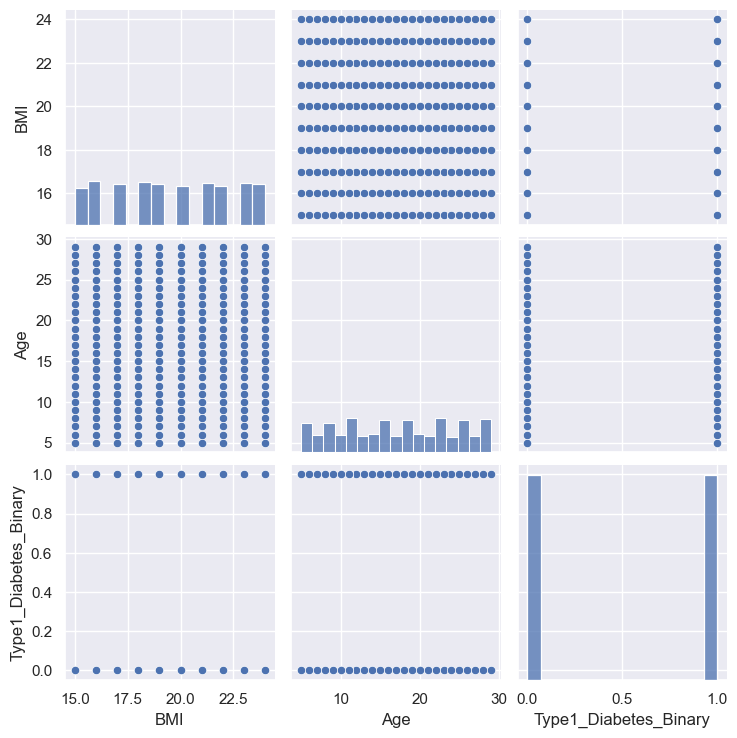

In [11]:
sns.pairplot(df_train)
plt.show()

In [12]:
model2 = smf.logit(formula='Type1_Diabetes_Binary ~ Physical_Activity + Dietary_Habits + Smoking_Status + Alcohol_Consumption + BMI ', data=df3).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.692058
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                            
=================================================================================
Dep. Variable:     Type1_Diabetes_Binary   No. Observations:                 5446
Model:                             Logit   Df Residuals:                     5438
Method:                              MLE   Df Model:                            7
Date:                   Thu, 12 Dec 2024   Pseudo R-squ.:                0.001541
Time:                           20:05:56   Log-Likelihood:                -3768.9
converged:                          True   LL-Null:                       -3774.8
Covariance Type:               nonrobust   LLR p-value:                    0.1134
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.1105      0.199     -0.555      0.579      -0.501       0.280
Physical_Activity[T.Low]            0.0278      0.066      0.420      0.675      -0.102       0.158
Physical_Activity[T.Moderate]       0.1583      0.067      2.371      0.018       0.027       0.289
Dietary_Habits[T.Unhealthy]         0.0248      0.054      0.456      0.648      -0.082       0.131
Smoking_Status[T.Smoker]           -0.0842      0.054     -1.550      0.121      -0.191       0.022
Alcohol_Consumption[T.Low]          0.0419      0.066      0.631      0.528      -0.088       0.172
Alcohol_Consumption[T.Moderate]     0.1046      0.067      1.564      0.118      -0.027       0.236
BMI                                 0.0022      0.009      0.232      0.816      -0.016       0.021
===================================================================================================
"""

In [13]:
model3 = smf.logit(formula='Type1_Diabetes_Binary ~ Physical_Activity + Dietary_Habits + Smoking_Status + Alcohol_Consumption + Age', data=df3).fit()
model3.summary()

Optimization terminated successfully.
         Current function value: 0.692062
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                            
=================================================================================
Dep. Variable:     Type1_Diabetes_Binary   No. Observations:                 5446
Model:                             Logit   Df Residuals:                     5438
Method:                              MLE   Df Model:                            7
Date:                   Thu, 12 Dec 2024   Pseudo R-squ.:                0.001534
Time:                           20:05:57   Log-Likelihood:                -3769.0
converged:                          True   LL-Null:                       -3774.8
Covariance Type:               nonrobust   LLR p-value:                    0.1153
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.0712      0.097     -0.735      0.462      -0.261       0.119
Physical_Activity[T.Low]            0.0276      0.066      0.416      0.677      -0.102       0.157
Physical_Activity[T.Moderate]       0.1578      0.067      2.365      0.018       0.027       0.289
Dietary_Habits[T.Unhealthy]         0.0248      0.054      0.457      0.648      -0.082       0.131
Smoking_Status[T.Smoker]           -0.0840      0.054     -1.547      0.122      -0.190       0.022
Alcohol_Consumption[T.Low]          0.0419      0.066      0.632      0.528      -0.088       0.172
Alcohol_Consumption[T.Moderate]     0.1045      0.067      1.563      0.118      -0.027       0.236
Age                                 0.0002      0.004      0.060      0.952      -0.007       0.008
===================================================================================================
"""

In [14]:
model4 = smf.logit(formula='Type1_Diabetes_Binary ~ Physical_Activity + Dietary_Habits + Smoking_Status + BMI + Age', data=df3).fit()
model4.summary()

Optimization terminated successfully.
         Current function value: 0.692285
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                            
=================================================================================
Dep. Variable:     Type1_Diabetes_Binary   No. Observations:                 5446
Model:                             Logit   Df Residuals:                     5439
Method:                              MLE   Df Model:                            6
Date:                   Thu, 12 Dec 2024   Pseudo R-squ.:                0.001213
Time:                           20:05:57   Log-Likelihood:                -3770.2
converged:                          True   LL-Null:                       -3774.8
Covariance Type:               nonrobust   LLR p-value:                    0.1651
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.0649      0.206     -0.316      0.752      -0.468       0.338
Physical_Activity[T.Low]          0.0289      0.066      0.436      0.663      -0.101       0.159
Physical_Activity[T.Moderate]     0.1593      0.067      2.388      0.017       0.029       0.290
Dietary_Habits[T.Unhealthy]       0.0254      0.054      0.468      0.640      -0.081       0.132
Smoking_Status[T.Smoker]         -0.0834      0.054     -1.538      0.124      -0.190       0.023
BMI                               0.0021      0.009      0.223      0.823      -0.016       0.021
Age                               0.0002      0.004      0.053      0.958      -0.007       0.008
=================================================================================================
"""

In [15]:
model5 = smf.logit(formula='Type1_Diabetes_Binary ~ Physical_Activity + Dietary_Habits + Alcohol_Consumption + BMI + Age', data=df3).fit()
model5.summary()

Optimization terminated successfully.
         Current function value: 0.692278
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                            
=================================================================================
Dep. Variable:     Type1_Diabetes_Binary   No. Observations:                 5446
Model:                             Logit   Df Residuals:                     5438
Method:                              MLE   Df Model:                            7
Date:                   Thu, 12 Dec 2024   Pseudo R-squ.:                0.001223
Time:                           20:05:57   Log-Likelihood:                -3770.1
converged:                          True   LL-Null:                       -3774.8
Covariance Type:               nonrobust   LLR p-value:                    0.2365
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.1541      0.208     -0.742      0.458      -0.561       0.253
Physical_Activity[T.Low]            0.0292      0.066      0.441      0.659      -0.101       0.159
Physical_Activity[T.Moderate]       0.1590      0.067      2.383      0.017       0.028       0.290
Dietary_Habits[T.Unhealthy]         0.0248      0.054      0.457      0.648      -0.082       0.131
Alcohol_Consumption[T.Low]          0.0433      0.066      0.652      0.514      -0.087       0.173
Alcohol_Consumption[T.Moderate]     0.1039      0.067      1.555      0.120      -0.027       0.235
BMI                                 0.0020      0.009      0.210      0.834      -0.017       0.021
Age                                 0.0003      0.004      0.073      0.941      -0.007       0.008
===================================================================================================
"""

In [16]:
model6 = smf.logit(formula='Type1_Diabetes_Binary ~ Physical_Activity + Smoking_Status + Alcohol_Consumption + BMI + Age', data=df3).fit()
model6.summary()

Optimization terminated successfully.
         Current function value: 0.692076
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                            
=================================================================================
Dep. Variable:     Type1_Diabetes_Binary   No. Observations:                 5446
Model:                             Logit   Df Residuals:                     5438
Method:                              MLE   Df Model:                            7
Date:                   Thu, 12 Dec 2024   Pseudo R-squ.:                0.001513
Time:                           20:05:57   Log-Likelihood:                -3769.0
converged:                          True   LL-Null:                       -3774.8
Covariance Type:               nonrobust   LLR p-value:                    0.1211
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.1026      0.208     -0.494      0.621      -0.510       0.305
Physical_Activity[T.Low]            0.0277      0.066      0.418      0.676      -0.102       0.158
Physical_Activity[T.Moderate]       0.1586      0.067      2.376      0.017       0.028       0.289
Smoking_Status[T.Smoker]           -0.0841      0.054     -1.550      0.121      -0.191       0.022
Alcohol_Consumption[T.Low]          0.0418      0.066      0.630      0.529      -0.088       0.172
Alcohol_Consumption[T.Moderate]     0.1048      0.067      1.567      0.117      -0.026       0.236
BMI                                 0.0022      0.009      0.235      0.814      -0.016       0.021
Age                                 0.0002      0.004      0.064      0.949      -0.007       0.008
===================================================================================================
"""

In [17]:
model7 = smf.logit(formula='Type1_Diabetes_Binary ~  Dietary_Habits + Smoking_Status + Alcohol_Consumption + BMI + Age', data=df3).fit()
model7.summary()

Optimization terminated successfully.
         Current function value: 0.692645
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                            
=================================================================================
Dep. Variable:     Type1_Diabetes_Binary   No. Observations:                 5446
Model:                             Logit   Df Residuals:                     5439
Method:                              MLE   Df Model:                            6
Date:                   Thu, 12 Dec 2024   Pseudo R-squ.:               0.0006926
Time:                           20:05:57   Log-Likelihood:                -3772.1
converged:                          True   LL-Null:                       -3774.8
Covariance Type:               nonrobust   LLR p-value:                    0.5148
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.0433      0.205     -0.211      0.833      -0.445       0.359
Dietary_Habits[T.Unhealthy]         0.0268      0.054      0.494      0.621      -0.080       0.133
Smoking_Status[T.Smoker]           -0.0846      0.054     -1.559      0.119      -0.191       0.022
Alcohol_Consumption[T.Low]          0.0378      0.066      0.571      0.568      -0.092       0.168
Alcohol_Consumption[T.Moderate]     0.1053      0.067      1.576      0.115      -0.026       0.236
BMI                                 0.0017      0.009      0.175      0.861      -0.017       0.020
Age                                 0.0003      0.004      0.083      0.934      -0.007       0.008
===================================================================================================
"""

In [18]:
y_pred_proba = model.predict(df_train)


In [19]:
y_true = df_train['Type1_Diabetes_Binary']


In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred_proba))
print(f"RMSE: {rmse}")

RMSE: 0.4993330312476755


In [21]:
df_train['predictive_prob'] = model.predict(df_train)
df_train[['predictive_prob','Type1_Diabetes_Binary']].head()

,predictive_prob,Type1_Diabetes_Binary
59096,0.490890,0
38798,0.537717,0
68459,0.463733,1
55209,0.493661,0
64079,0.494986,0


In [22]:
from sklearn.metrics import roc_curve
fprs, tprs, thresholds = roc_curve(y_true, 
                            y_score=df_train['predictive_prob'])

In [23]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_true=df_train['Type1_Diabetes_Binary'], 
                            y_score=df_train['predictive_prob'])
auc

0.5295492107393416

In [24]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

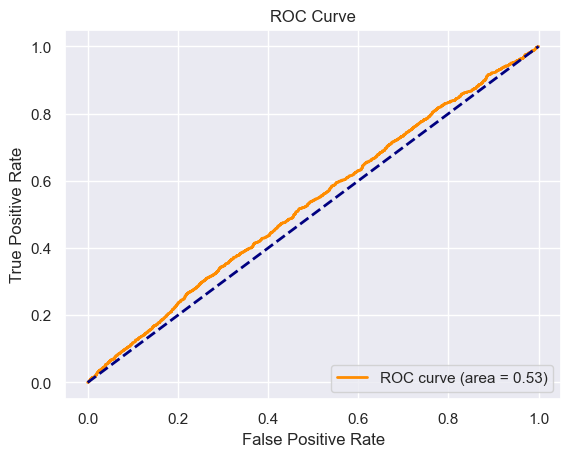

In [25]:
plot_roc(fprs, tprs, auc)


In [26]:
df_train['predictive_prob'] = model.predict(df_train)
df_train[['predictive_prob','Type1_Diabetes_Binary']].head()

,predictive_prob,Type1_Diabetes_Binary
59096,0.490890,0
38798,0.537717,0
68459,0.463733,1
55209,0.493661,0
64079,0.494986,0


In [27]:
from sklearn.metrics import roc_curve
fprs, tprs, thresholds = roc_curve(y_true, 
                            y_score=df_train['predictive_prob'])

In [28]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_true=df_train['Type1_Diabetes_Binary'], 
                            y_score=df_train['predictive_prob'])
auc

0.5295492107393416

In [29]:
fprs

array([0.00000000e+00, 4.58715596e-04, 9.17431193e-04, ...,
       9.99082569e-01, 9.99082569e-01, 1.00000000e+00])